RGB三通道图片的格式为$H \times W \times C$

输入一个符合上述格式的张量, `plt.imshow()`将会按3个通道合成的方式显示照片.

torch.Size([900, 1440, 3])


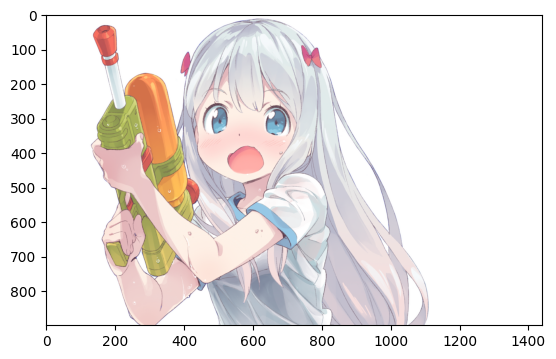

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torchvision.transforms as transforms

import torch
from torch import nn

img_path = "/Users/simenonszhang/Desktop/test.PNG"

image = mpimg.imread(img_path)
image = torch.tensor(image)
plt.imshow(image)
print(image.shape)

相应的, 我们可以单独显示某个通道. 此时以类似于灰度图片的形式进行输出.

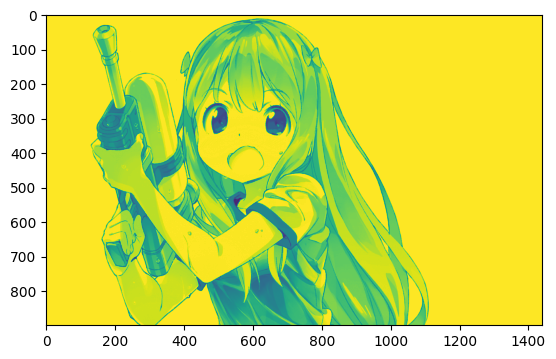

In [6]:
plt.imshow(image[:, :, 0])

在输出时, 我们仍然需要按RGB三个通道进行输出. 所以在`corr2d_multi_in()`中, 我们不能再将多个输入的运算结果求和后输出, 而是要保持RGB三个通道的输出.

In [7]:
def corr2d(X, K):
  h, w = K.shape
  out_h, out_w = X.shape[0] - h + 1, X.shape[1] - w + 1
  Y = torch.zeros(out_h, out_w)
  for i in range(out_h):
    for j in range(out_w):
      Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
  return Y

def corr2d_multi_in(X, K):
  Y = [] # stack accept list
  for x, k in zip(X, K):
    Y.append(corr2d(x, k))
  return torch.stack(Y, 0)

In [14]:
k = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) # 锐化卷积核
K = torch.stack([k, k, k], 0) # 对每个通道使用相同的kernel
input_img = image.transpose(0, 2) # 将通道(第2维放到第0维)

# Pimage = corr2d_multi_in(input_img, K)
for i in range(3):
  input_img = corr2d_multi_in(input_img, K)
Pimage = input_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


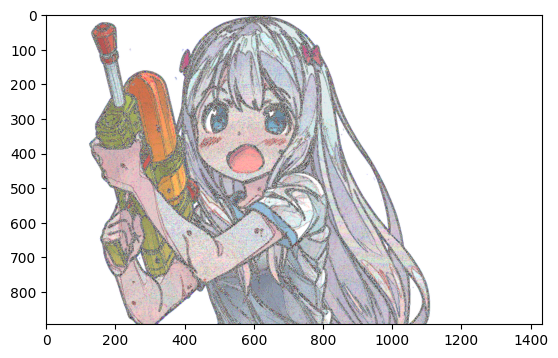

In [15]:
output_image = Pimage.transpose(0, 2)
plt.imshow(output_image)

你能看出来锐化了吗??